
# Project Title: Iris Flower Classification
--- 
## Objective:
Classify iris flowers into three species (Setosa, Versicolor, Virginica) based on sepal and petal features.


### Import Libraries
---

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### load Dataset
---

In [41]:
df = pd.read_csv("Iris.csv")
df.drop(columns = 'Id' , axis = 1 , inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### # Description of Dataset
![Iris Flower](iris_flower.jpeg)



![features](features.png)

* Sepal Length (cm) : The length of the sepal (the outer part of the flower) in centimeters.

* Sepal Width (cm) : The width of the sepal in centimeters.

* Petal Length (cm) : The length of the petal (the colorful inner part of the flower) in centimeters.

* Petal Width (cm) : The width of the petal in centimeters.

* Species (Target Variable)
    The class label of the flower:
        Iris setosa
        Iris versicolor
        Iris virginica

#### Exploratory Data Analysis (EDA)
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Univariate Analysis

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: xlabel='Species', ylabel='count'>

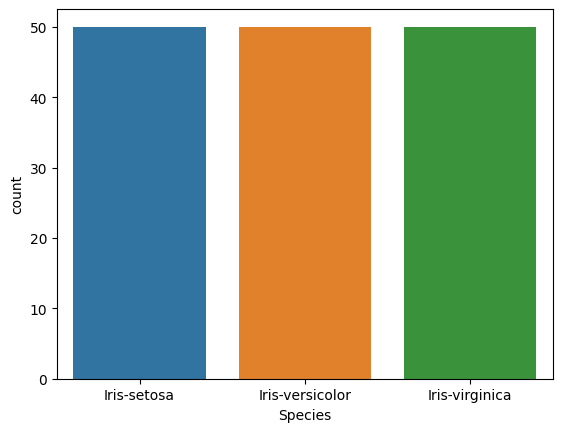

In [15]:
#categorical column - Species
print(df['Species'].value_counts())
sns.countplot(data = df , x = 'Species',hue = 'Species')

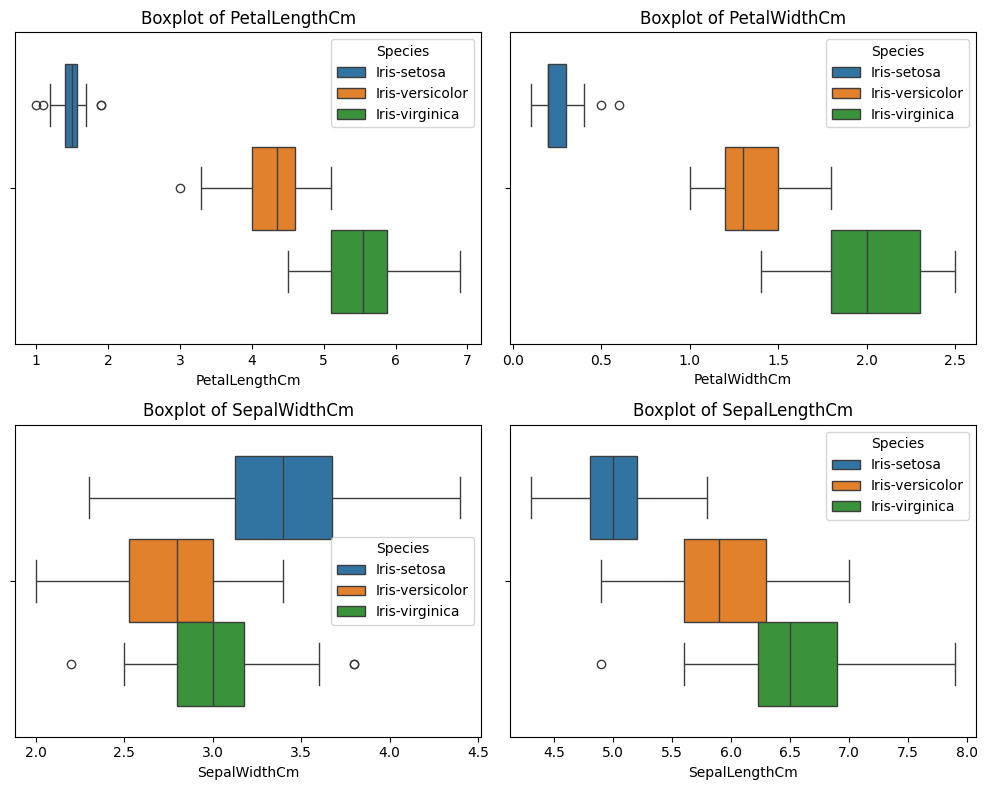

In [29]:
#numerical column - SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm
numerical_col = ['PetalLengthCm','PetalWidthCm' , 'SepalWidthCm','SepalLengthCm']

plt.figure(figsize=(10, 8))

for  i, col in enumerate(numerical_col , 1):
    plt.subplot(2,2,i)
    sns.boxplot(data = df , x = col , hue = 'Species')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

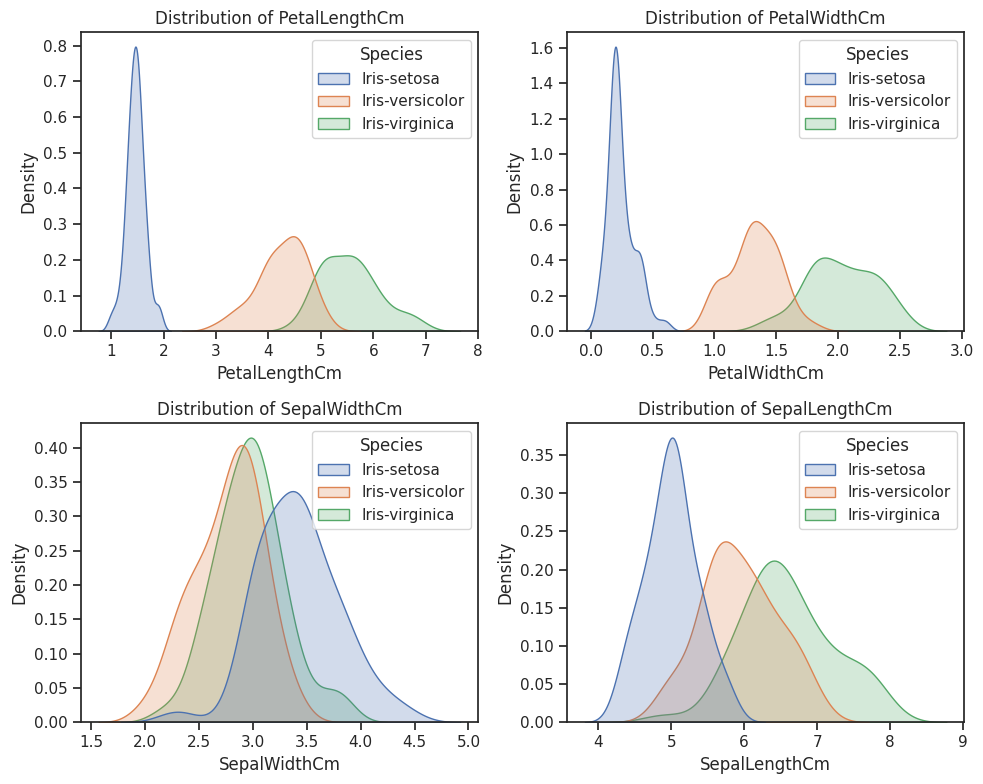

In [43]:
plt.figure(figsize=(10, 8))
for i , col in enumerate(numerical_col , 1):
    plt.subplot(2,2,i)
    sns.kdeplot( data = df , x = col , hue = 'Species' , fill = True )
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

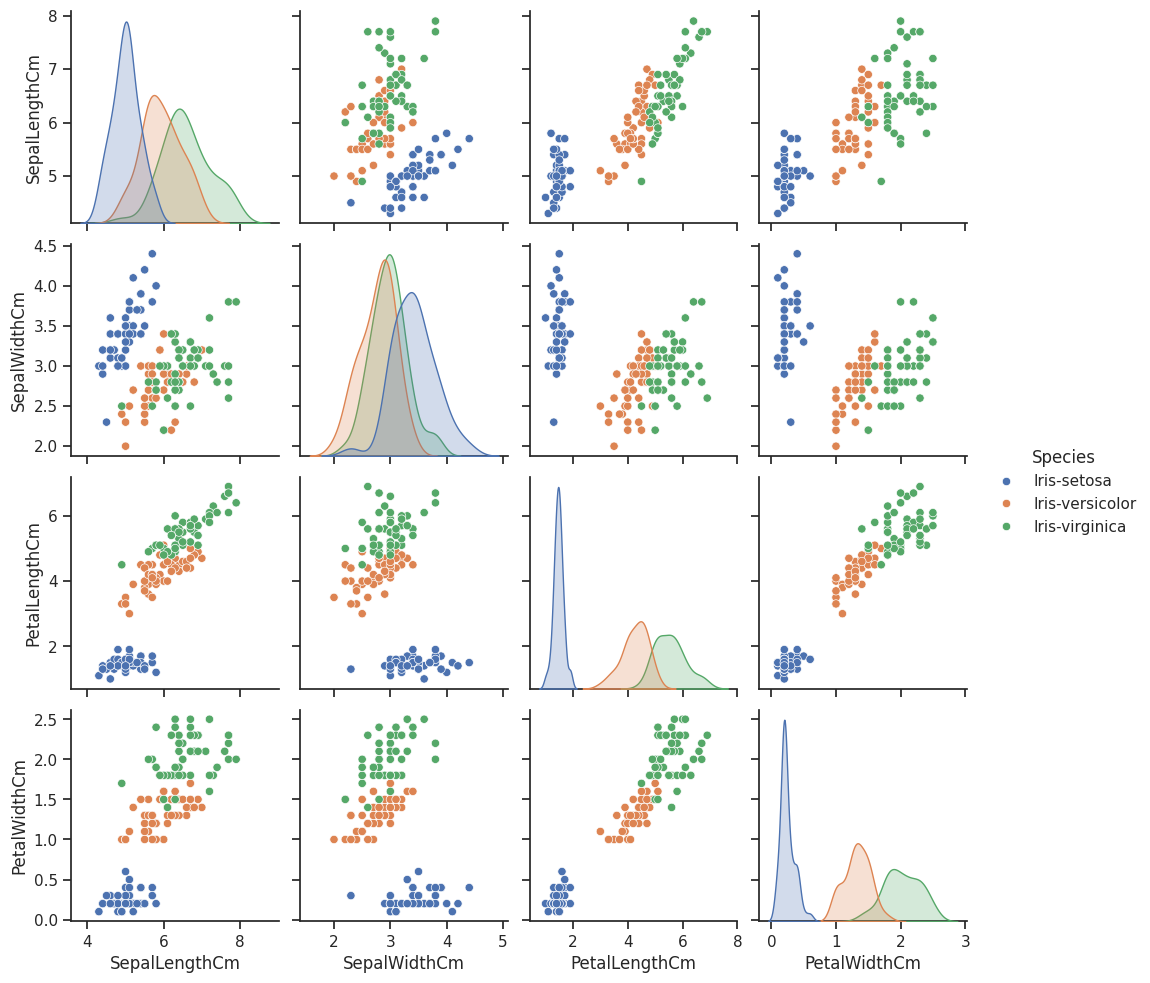

In [42]:
sns.set_theme(style = 'ticks')
sns.pairplot(data = df , hue = 'Species')

<Axes: >

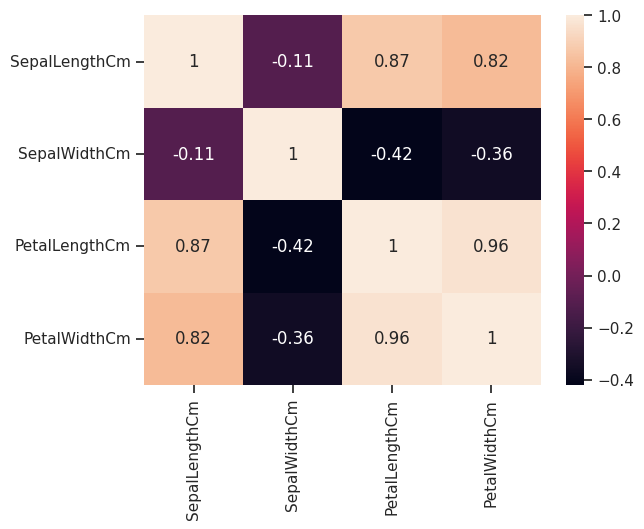

In [47]:
sns.heatmap(df.corr(numeric_only= True), annot=True)

In [36]:
df.skew(numeric_only = True)

Id               0.000000
SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

#### Preprocessing 
---

In [48]:
x = df.drop(columns = 'Species' , axis = 1)
y = df['Species']

In [52]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42) 

#### Build & Train Model
---

In [54]:
#transformation 

lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [68]:
model = LogisticRegression()
model.fit(x_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Model Evaluation
---

In [65]:
y_pred = model.predict(x_test)

In [66]:
print('Accuracy_score :' , accuracy_score(y_test , y_pred))
print('Confusion_matrix :\n', confusion_matrix(y_test, y_pred))


Accuracy_score : 1.0
Confusion_matrix :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [67]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Save Model
---

In [ ]:
import joblib
joblib.dump(model, 'iris_model.pkl')

['iris_model.pkl']